In [92]:
import pandas as pd
import numpy as np                #for calculations
import matplotlib.pyplot as plt   #for graph plotting
from datetime import datetime     #for datetime functionalities
from pandas import Series
import warnings                   #to ignore warnings
warnings.filterwarnings("ignore")

# Loading the data


In [93]:
train=pd.read_csv("train.csv")  #loading the train data
test=pd.read_csv("test.csv")    #loading the test data

In [94]:
test_org=test.copy()     #making copies of data 
train_org=train.copy()   #making copies of data

In [95]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [96]:
train.columns


Index(['ID', 'Datetime', 'Count'], dtype='object')

In [97]:
test.shape, train.shape

((5112, 2), (18288, 3))

# Data Feature Extraction

In [98]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [99]:
train.head(15)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [100]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')   #changing the format of the 'Datetime' column
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_org['Datetime'] = pd.to_datetime(test_org.Datetime,format='%d-%m-%Y %H:%M')
train_org['Datetime'] = pd.to_datetime(train_org.Datetime,format='%d-%m-%Y %H:%M')

In [101]:
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [102]:
for i in (train, test, test_org, train_org):    #extracting year,month,day and hour from 'Datetime' column.
    i['Year']=i.Datetime.dt.year 
    i['Month']=i.Datetime.dt.month 
    i['Day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [103]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [104]:
train['type of day']=train['Datetime'].dt.dayofweek
temp1=train['Datetime']

In [105]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,type of day
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [106]:
def check_weekend(row):                                                  #return 1 if weekend(5 and 6 i.e. Sat and Sun),else 0
    if row.dayofweek ==5 or row.dayofweek==6:
        return 1
    else:
        return 0

In [107]:
train['Weekend']=train['Datetime'].apply(check_weekend)

In [108]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,type of day,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


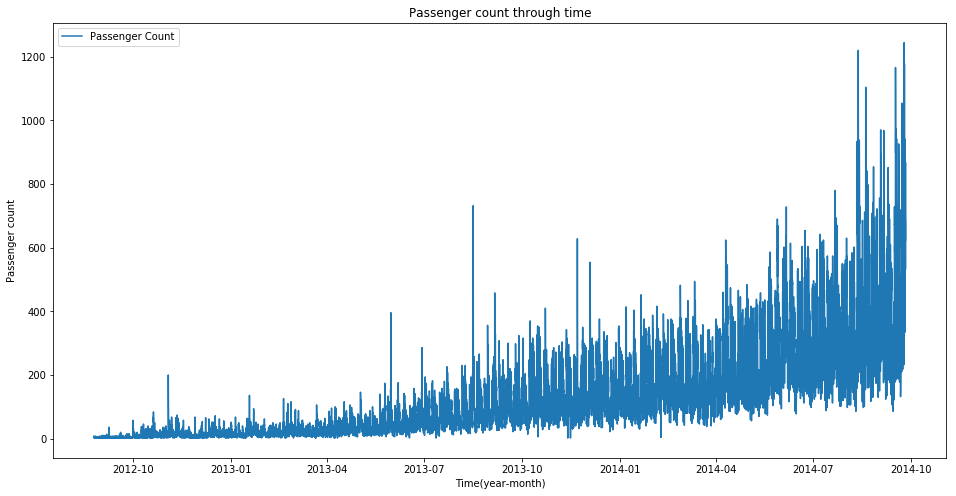

In [109]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Passenger count through time')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

# Exploratory Data Analysis


#### Testing the first Hypothesis whether the traffic will increase over the duration of time


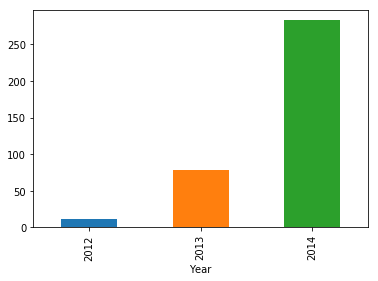

In [110]:
train.groupby('Year')['Count'].mean().plot.bar()


This validates that traffic will grow over time exponentially

#### Testing the second hypothesis about the traffic increasing from May to October

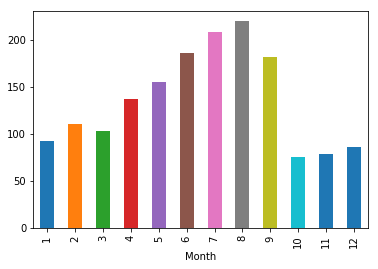

In [111]:
train.groupby('Month')['Count'].mean().plot.bar()

In [112]:
temp=train.groupby(['Year','Month'])['Count'].mean()

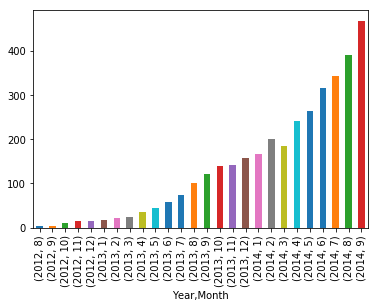

In [113]:
t1=temp.plot.bar()


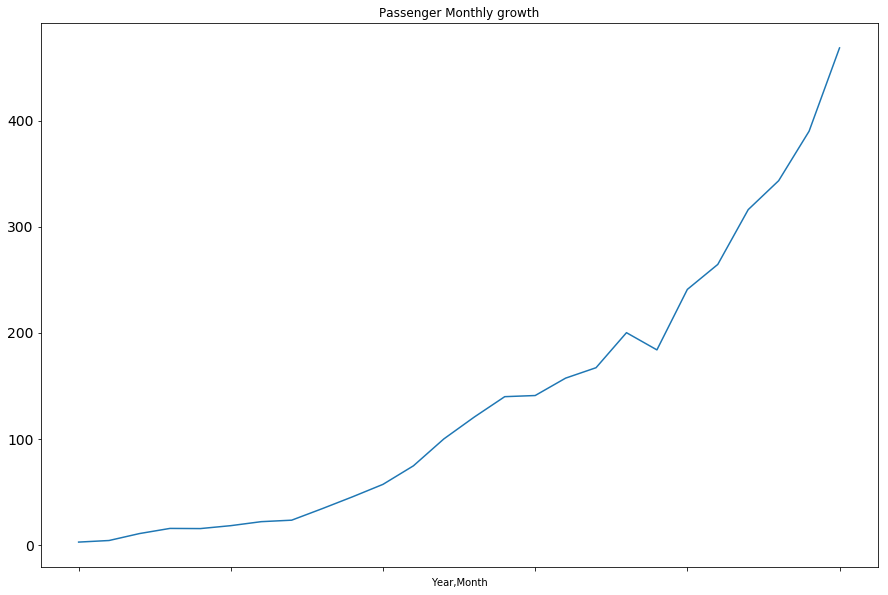

In [114]:
t2=temp.plot(figsize=(15,10),title='Passenger Monthly growth',fontsize=14)


The above graph shows an exponential growth in the monthly passsenger count


#### Testing the hypothesis whether the traffic is more on the weekdays

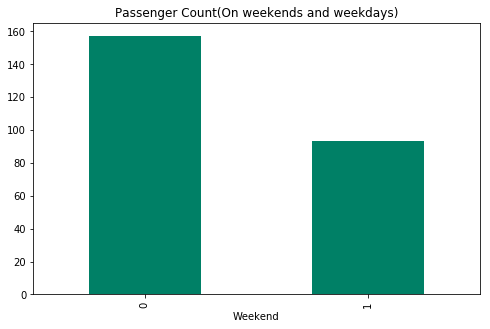

In [115]:
train.groupby('Weekend')['Count'].mean().plot.bar(figsize=(8,5),title='Passenger Count(On weekends and weekdays)',cmap='summer')


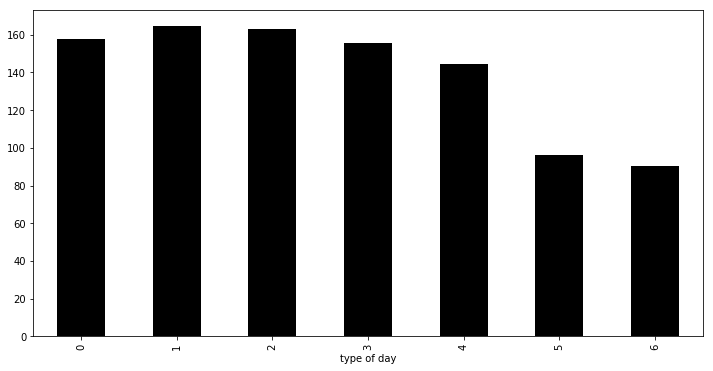

In [116]:
train.groupby('type of day')['Count'].mean().plot.bar(figsize=(12,6),cmap='copper')


Here we can see that the passenger count is less on the weekends and significantly more on the weekdays

In [117]:
train=train.drop('ID', axis = 1)  #dropping the id  variable 


#### Checking the hourly count of passengers as we have a hypothesis that in peak hours there will be more passengers

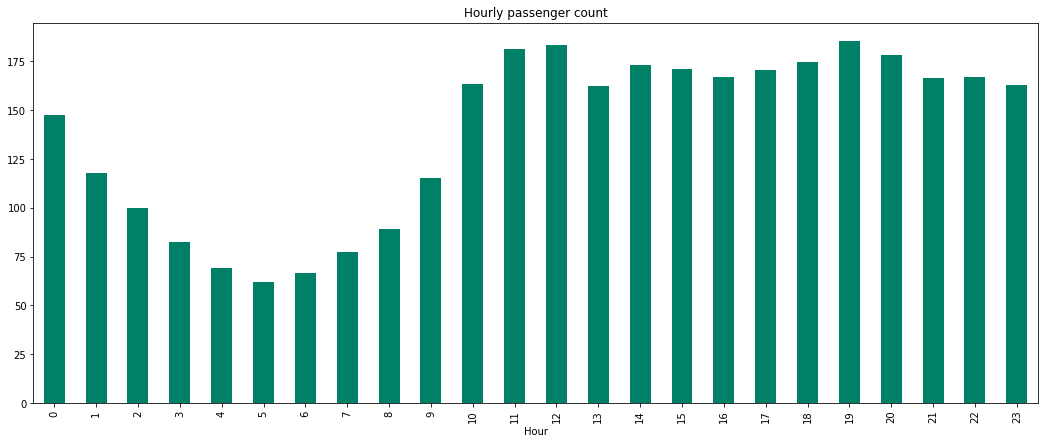

In [118]:
train.groupby('Hour')['Count'].mean().plot.bar(figsize=(18,7),title='Hourly passenger count',cmap='summer')


It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.

#### Aggregating the hourly count to days, weeks and months to reduce the noise and making the data discovery more easy and sophisticated.

In [119]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%y %H:%M')
train.index=train.Timestamp   #to store axis labels as the time i.e x-axis will have 'time' as the label. 

#Resample method: Convenience method for frequency conversion and resampling of time series. 
#Object must have a datetime-like index .

#Hourly time series
hourly=train.resample('H').mean()

#daily time series
daily=train.resample('D').mean()

#weekly time series
weekly=train.resample('W').mean()

#monthly time series
monthly=train.resample('M').mean()

Plotting the timeseries to see the stability after resampling

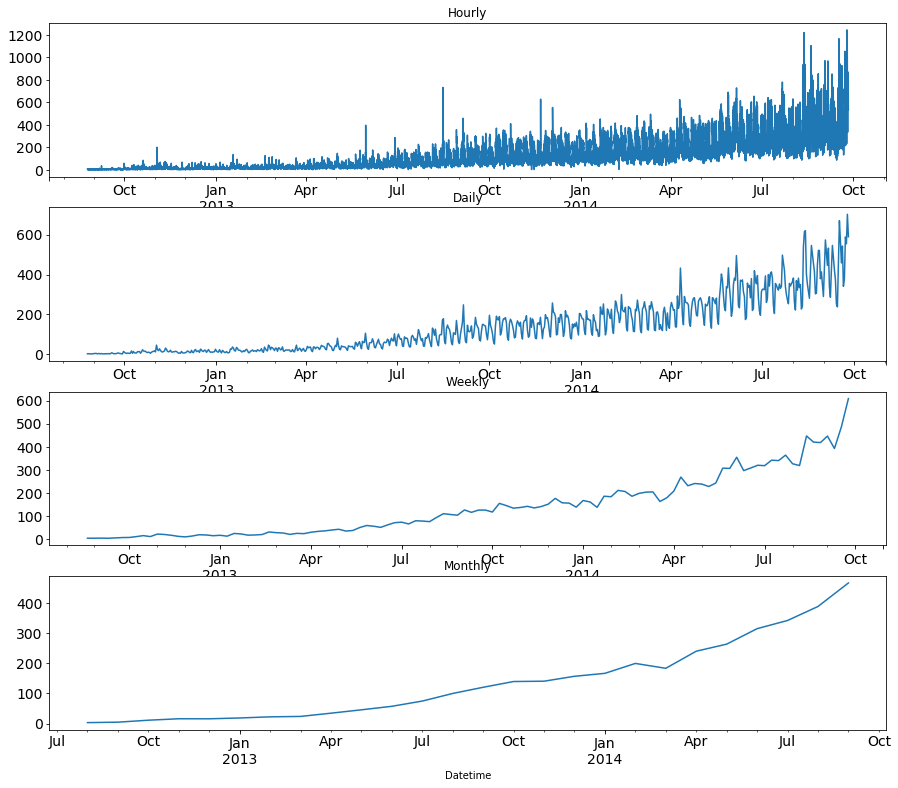

In [121]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,18), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,13), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,13), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,13), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [122]:
#FOR 'TEST' DATASET:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

#FOR 'TRAIN' DATASET
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

## FORECASTING THE TIME-SERIES

Division of the train dataset into two parts. One part is used to train the model and the other part is used as the validation dataset.

We will use time based splitting as we have a continous, time series dataset

In [132]:
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-24']   
#.ix[] supports mixed integer and label based access.
#It is primarily label based, but will fall back to integer positional access unless the corresponding axis is of integer type

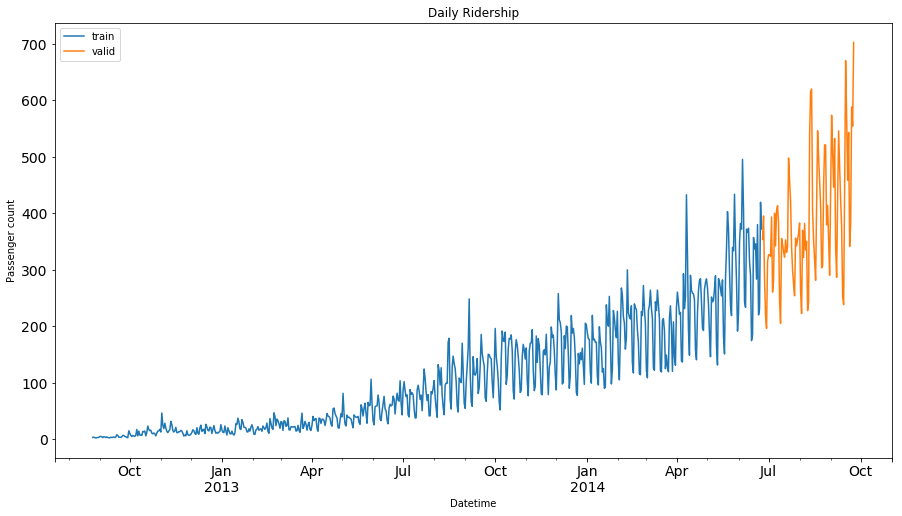

In [133]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') #'Count' is the column name here.
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

The blue part is the train data and the orange is the validation data

## Holt's Linear Trend Model

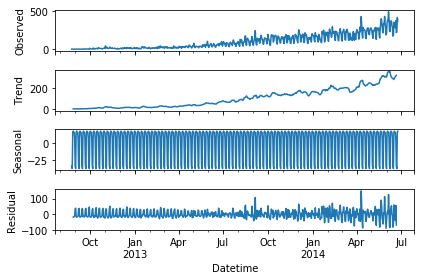

In [134]:
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing,Holt    #for statistical modeling

sm.tsa.seasonal_decompose(Train.Count).plot()

#When the trend increases or decreases linearly, additive equation is used whereas when the trend increases or decreases
#exponentially, multiplicative equation is used.

result=sm.tsa.stattools.adfuller(Train.Count)
plt.show()

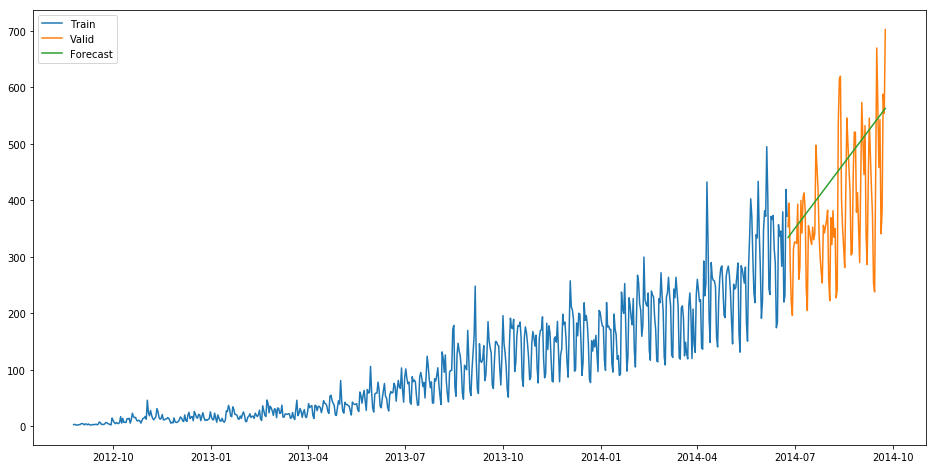

In [135]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [137]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [138]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

113.52677834630248


#### Making predictions on the test dataset

In [141]:
submission=pd.read_csv('Sample Submission.csv')

In [142]:
predict=fit1.forecast(len(test)) 

In [143]:
test['prediction']=predict

In [144]:
# Calculating the hourly ratio of count (ratio of passenger count for each hour given in table for each day.)
train_org['ratio']=train_org['Count']/train_org['Count'].sum()

In [145]:
train_org.head()

,ID,Datetime,Count,Year,Month,Day,Hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07


In [154]:
# Grouping the hourly ratio  (grouping hourly ratio of passenger count by suming the ratios of each hour,will get 24 ratios now.)
temp=train_org.groupby(['Hour'])['ratio'].sum()
temp

Hour
0     0.044287
1     0.035343
2     0.029911
3     0.024714
4     0.020802
5     0.018621
6     0.020023
7     0.023221
8     0.026741
9     0.034555
10    0.049047
11    0.054375
12    0.054951
13    0.048600
14    0.051965
15    0.051309
16    0.049999
17    0.051164
18    0.052423
19    0.055627
20    0.053455
21    0.049895
22    0.050076
23    0.048892
Name: ratio, dtype: float64

In [155]:
# Groupby to csv format
pd.DataFrame(temp, columns=['ratio']).to_csv('GROUPby.csv') #given only one column here as the 'Hour' column is already in temp.
temp2=pd.read_csv("GROUPby.csv")

In [156]:
test.head()

,ID,Year,Month,Day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


In [157]:
test_org.head()

,ID,Datetime,Year,Month,Day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [158]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_org, on=('Day','Month', 'Year'), how='left')
merge.head()

,ID_x,Year,Month,Day,Hour_x,prediction,ID_y,Datetime,Hour_y
0,18299.5,2014.0,9.0,26.0,11.5,334.650767,18288,2014-09-26 00:00:00,0
1,18299.5,2014.0,9.0,26.0,11.5,334.650767,18289,2014-09-26 01:00:00,1
2,18299.5,2014.0,9.0,26.0,11.5,334.650767,18290,2014-09-26 02:00:00,2
3,18299.5,2014.0,9.0,26.0,11.5,334.650767,18291,2014-09-26 03:00:00,3
4,18299.5,2014.0,9.0,26.0,11.5,334.650767,18292,2014-09-26 04:00:00,4


In [159]:
#Now removing unnecessary columns from the merged table.
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1)

#  Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [160]:
submission=prediction.drop(['ID_x', 'Day', 'ID_y','prediction','Hour', 'ratio'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

## Holt's Winter Model

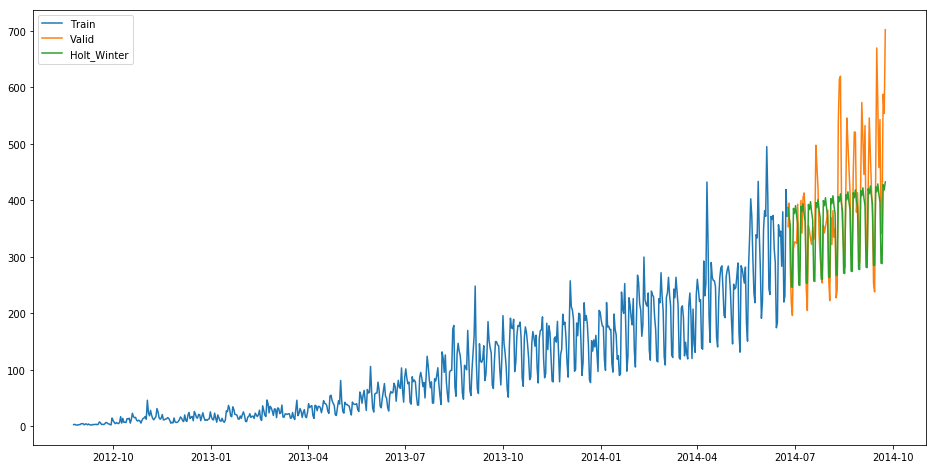

In [161]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [162]:
#Root mean square value for holt winter method:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

80.78404649149276


The RMSE is significanly low in this model and hence we can forecast on Test dataset

In [163]:
predict=fit1.forecast(len(test))   #gives predicted count of passenger in form of arrays.

In [164]:
test['prediction']=predict

In [166]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_org, on=('Day','Month', 'Year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [171]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['Day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Sample Submission.csv')
